In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/hiking_data.csv")

In [3]:
df.head()

,time,distance
0,0.00,0.132007
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.468150


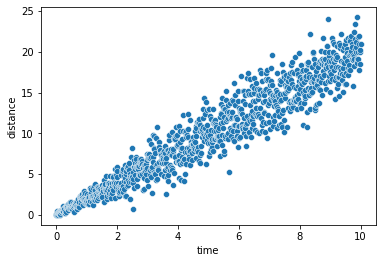

In [4]:
sns.scatterplot(x=df["time"], y=df["distance"]);

We can see a linear relationship between distance and time

In [5]:
df["duration_grp"] = ["short" if x < 5 else "long" for x in df["time"]]

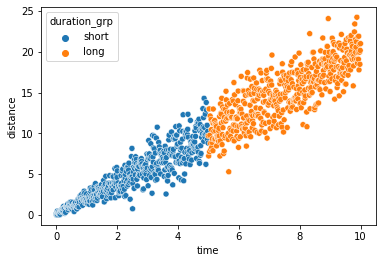

In [6]:
sns.scatterplot(x=df["time"], y=df["distance"], hue=df["duration_grp"]);

Text(0, 0.5, 'Hike Counts per Distance')

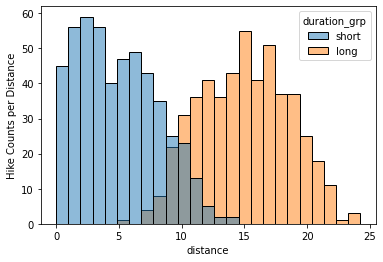

In [7]:
sns.histplot(df, x="distance", hue="duration_grp", bins=25)
plt.ylabel("Hike Counts per Distance")

The short duration group has a mean trip distance of about 5 miles and the long duration group has a mean about 15.

Ths difference from each group is on average about 10 miles

In [8]:
# Test Statistic

# Group into early and late times
group_short = df[df["duration_grp"] == "short"]["distance"]
group_long = df[df["duration_grp"] == "long"]["distance"]

# Resample distributions
resample_short = np.random.choice(group_short, size=500, replace=True)
resample_long = np.random.choice(group_long, size=500, replace=True)

In [9]:
# Test statistic
test_statistic = resample_long - resample_short

# Effect size as mean of the test statistic distribution
effect_size = np.mean(test_statistic)

Effect size meaning how increasing time effects a change in distance.

In [10]:
# Shuffle and Split

# concatanate and shuffle
shuffle_bucket = np.concatenate((group_long, group_short))
np.random.shuffle(shuffle_bucket)

# split in the middle using slice_index
slice_index = len(shuffle_bucket) // 2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index+1:]

In [11]:
# Resample and test again

# Resample shuffled populations
shuffled_sample1 = np.random.choice(shuffled_half1, size=500, replace=True)
shuffled_sample2 = np.random.choice(shuffled_half2, size=500, replace=True)

# Recompute test statistic and effect size

# test statistic
shuffled_test_statistic = shuffled_sample2 - shuffled_sample1

# effect size
shuffled_effect_size = np.mean(shuffled_test_statistic)

# p-value as the proportion of shuffled_test_values >= effect_size
condition = shuffled_test_statistic >= effect_size
shuffled_pvalue = len(shuffled_test_statistic[condition]) / len(shuffled_test_statistic)

Text(0.5, 1.0, 'Test Statistic Distibution, \nEffect Size = 10.15, p-value = 0.14')

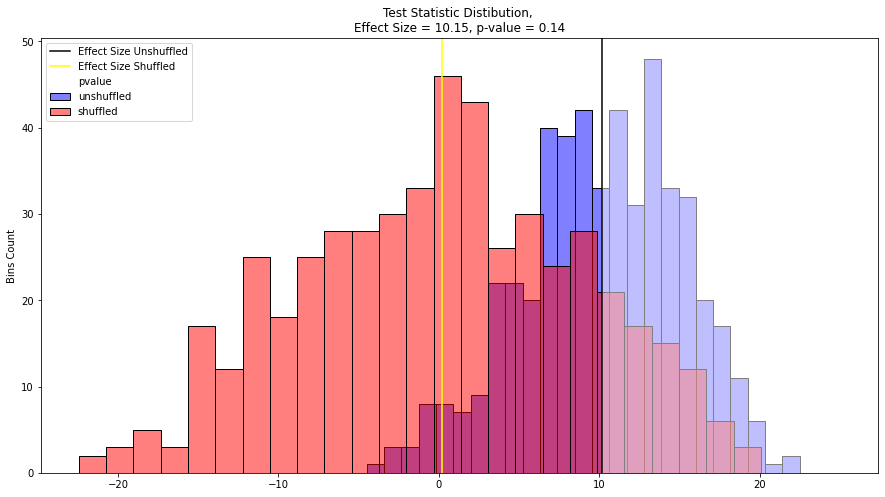

In [23]:
# Visualize the two test statistic distributions

fig = plt.subplots(sharey=True, figsize=(15,8))

sns.histplot(test_statistic, color="blue", alpha=0.5, label="unshuffled", bins=25)
sns.histplot(shuffled_test_statistic, color="red", alpha=0.5, label="shuffled", bins=25)
plt.axvline(effect_size, color="black", label="Effect Size Unshuffled")
plt.axvline(shuffled_effect_size, color="yellow", label="Effect Size Shuffled")
plt.axvspan(xmin=effect_size, xmax=25, color="white", alpha=0.5, label="pvalue")
plt.legend()
plt.ylabel("Bins Count")
plt.title("Test Statistic Distibution, \n"
                  "Effect Size = {:0.2f}, p-value = {:0.02f}".format(effect_size, shuffled_pvalue))

* Distribution of unshuffled data has a mean of 10 as seen in black vertical line.
* Distribution of shuffled data has a mean of 0 as seen in yellow vertical line.
* The measure of how often a value over 10 can be generated by randomness is seen as the fraction of shuffled data located to the right of 10, called pvalue. Here it is 0.14 meaning that there is 14% chance to get that value from random chance.